 # Settings

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scikit_posthocs as sp
from pathlib import Path
from scipy.stats import shapiro, wilcoxon, levene, fligner, kruskal, linregress

In [2]:
ALPHA = 0.05
CONFIGS_DIR = Path("config")
FIGURES_DIR = Path("figures")

if not FIGURES_DIR.exists():
    FIGURES_DIR.mkdir()

In [3]:
sns.set_theme(
    style="whitegrid",
    context="paper",
    palette="colorblind",
    color_codes=True,
    font_scale=1.5,
)
plt.style.use(CONFIGS_DIR / "figures.mplstyle")

In [4]:
def eta_squared(H, k, n):
    """
    Compute the eta-squared measure for the Kruskal-Wallis H-test.

    Parameters
    ----------
    H : float
        The value obtained in the Kruskal-Wallis test.
    k : int
        The number of groups.
    n : int
        The total number of samples.

    Returns
    -------
    eta_squared : float
        The eta-squared estimate.
    """
    return (H - k + 1) / (n - k)

# Load results file

In [5]:
df = pd.read_csv("data/measurements.csv")

In [6]:
df

,image_path,algorithm,K,previous_fen,true_fen,predicted_fen,true_move_uci,true_move,predicted_move_uci,predicted_move,...,pieces_black,legal_moves,prediction_latency,energy_total_codecarbon,energy_cpu_codecarbon,energy_gpu,energy_ram,energy_co2,energy_cpu_amd,energy_total
0,out/images\match-20240630T213748\move-17.png,IA,-1.0,r1q2rk1/1pp2ppp/p1np1n2/2b1p3/2P3b1/P1N1P1PP/1...,r2q1rk1/1pp2ppp/p1np1n2/2b1p3/2P3b1/P1N1P1PP/1...,r1q2rk1/1pp2ppp/p1np1n2/2b1p3/2P3b1/P1N1P1PP/1...,c8d8,Qd8,NaN,NaN,...,16,45,0.305875,46.052663,33.718580,3.087002,9.247081,0.000003,6.760266,19.094349
1,out/images\match-20240630T200952\move-56.png,IA,-1.0,1rb1nk2/p1r1np1p/Ppp3p1/8/1P1NP3/1N3qP1/4P2P/2...,1rb1nk2/p1r1np1p/Ppp3p1/8/1P1NP3/1N3PP1/7P/2RR...,1rb1nk2/p1r1np1p/Ppp3p1/8/1P1NP3/1N3PP1/7P/2RR...,e2f3,exf3,e2f3,exf3,...,13,29,0.255584,93.813694,73.822834,6.468005,13.522854,0.000006,5.239871,25.230730
2,out/images\match-20240630T213748\move-82.png,IA,-1.0,6b1/8/p5kp/5p1N/4R1P1/P3r2P/7K/2r1B3 w - - 1 41,6b1/8/p5kp/5p1N/6P1/P3R2P/7K/2r1B3 b - - 1 41,6b1/8/p5kp/5p1N/6P1/P3R2P/7K/2r1B3 b - - 0 41,e4e3,Rxe3,e4e3,Rxe3,...,7,28,0.267126,88.268908,69.724029,5.041004,13.503874,0.000005,4.858727,23.403605
3,out/images\match-20240630T200952\move-82.png,IA,-1.0,2R5/p1r4p/Pp1kBnp1/1p3p2/1n3P1P/1N4P1/4R3/6K1 ...,2R5/p2r3p/Pp1kBnp1/1p3p2/1n3P1P/1N4P1/4R3/6K1 ...,2r5/p6p/Pp1kBnp1/1p3p2/1n3P1P/1N4P1/4R3/6K1 w ...,c7d7,Rd7,c7c8,Rxc8,...,10,30,0.279235,90.380841,71.323206,5.178004,13.879630,0.000005,5.206433,24.264067
4,out/images\match-20240630T213748\move-25.png,IA,-1.0,r2q1rk1/1pp2ppp/pbnp1nb1/8/2PPBPP1/P1N4P/1P2N3...,r2q1rk1/1pp2ppp/pbnp1nb1/8/2PP1PP1/P1N4P/1P2N1...,r2q1rk1/1pp2ppp/pbnp1nB1/8/2PP1PP1/P1N4P/1P2N3...,e4g2,Bg2,e4g6,Bxg6,...,15,40,0.344056,92.116999,73.933352,3.667003,14.516644,0.000006,6.504124,24.687771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,out/images\match-20240630T200952\move-90.png,TK,10.0,2R5/p1rR3p/Ppk1Bnp1/1N3p2/1n3P1P/6P1/3p4/6K1 w...,2R5/p1r4p/Ppk1Bnp1/1N3p2/1n3P1P/6P1/3R4/6K1 w ...,2R5/p1r4p/Ppk1Bnp1/1N3p2/1n3P1P/6P1/3R4/6K1 b ...,d7d2,Rxd2,d7d2,Rxd2,...,10,39,0.610755,146.475364,115.425464,4.791004,26.258896,0.000009,11.592028,42.641928
27996,out/images\match-20240630T213748\move-65.png,TK,10.0,3Qr1b1/5ppk/p6p/4NP2/1B4P1/P6P/3r4/4RR1K b - -...,3rr1b1/5ppk/p6p/4NP2/1B4P1/P6P/8/4RR1K b - - 2 33,3rr1b1/5ppk/p6p/4NP2/1B4P1/P6P/8/4RR1K w - - 0 34,d2d8,Rdxd8,d2d8,Rdxd8,...,8,25,0.474717,149.062226,111.957861,11.905010,25.199355,0.000009,9.467970,46.572335
27997,out/images\match-20240630T213748\move-54.png,TK,10.0,r3r2k/4Bppb/p6p/4NPq1/5BP1/P4Q1P/8/R4R1K b - -...,r3r2k/4qppb/p6p/4NP2/5BP1/P4Q1P/8/R4R1K w - - ...,r3r2k/4qppb/p6p/4NP2/5BP1/P4Q1P/8/R4R1K w - - ...,g5e7,Qxe7,g5e7,Qxe7,...,9,26,0.444424,141.020946,111.027398,5.198004,24.795544,0.000009,8.550828,38.544377
27998,out/images\match-20240630T213748\move-54.png,TK,7.0,r3r2k/4Bppb/p6p/4NPq1/5BP1/P4Q1P/8/R4R1K b - -...,r3r2k/4qppb/p6p/4NP2/5BP1/P4Q1P/8/R4R1K w - - ...,r3r2k/4qppb/p6p/4NP2/5BP1/P4Q1P/8/R4R1K w - - ...,g5e7,Qxe7,g5e7,Qxe7,...,9,26,0.423053,139.120284,109.345922,5.099004,24.675358,0.000008,8.560971,38.335333


In [7]:
df.columns

Index(['image_path', 'algorithm', 'K', 'previous_fen', 'true_fen',
       'predicted_fen', 'true_move_uci', 'true_move', 'predicted_move_uci',
       'predicted_move', 'correct', 'turn', 'correct_squares', 'pieces_white',
       'pieces_black', 'legal_moves', 'prediction_latency',
       'energy_total_codecarbon', 'energy_cpu_codecarbon', 'energy_gpu',
       'energy_ram', 'energy_co2', 'energy_cpu_amd', 'energy_total'],
      dtype='object')

# Initial preprocessing:

- Rename column of CPU: This is to ensure that both the code of Codecarbon and the code of AMD uProf work well here in terms of having the same column names

- Define `algorithms` and `Ks` variables

- add a column `order` to order algorithms in chronological order

In [8]:
if "energy_cpu_amd" in df.columns:
    df["energy_cpu"] = df["energy_cpu_amd"]
else:
    df["energy_cpu"] = df["energy_cpu_codecarbon"]

In [9]:
df.algorithm.unique()

array(['IA', 'CPA', 'CPS', 'SD', 'ESD', 'TK'], dtype=object)

In [10]:
algorithms = np.unique(df.algorithm)
algorithms

array(['CPA', 'CPS', 'ESD', 'IA', 'SD', 'TK'], dtype=object)

In [11]:
Ks = np.unique(df[df.algorithm == "TK"].K)
Ks

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [12]:
df["alg_K"] = df["algorithm"] + df["K"].apply(
    lambda x: f"-{int(x)}" if x != -1 else ""
)  #
df["alg_K"].unique()

array(['IA', 'CPA', 'CPS', 'SD', 'ESD', 'TK-2', 'TK-3', 'TK-4', 'TK-5',
       'TK-6', 'TK-7', 'TK-8', 'TK-9', 'TK-10'], dtype=object)

In [13]:
order_algorithm = {
    "SD": 0,
    "ESD": 1,
    "IA": 2,
    "CPA": 3,
    "CPS": 4,
    "TK": 5,
    "TK-1": 6,
    "TK-2": 7,
    "TK-3": 8,
    "TK-4": 9,
    "TK-5": 10,
    "TK-6": 11,
    "TK-7": 12,
    "TK-8": 13,
    "TK-9": 14,
    "TK-10": 15,
}


def sort_algorithm(x):
    return x.map(order_algorithm)


df = df.sort_values(by=["alg_K"], key=sort_algorithm)
df.alg_K.unique()

array(['SD', 'ESD', 'IA', 'CPA', 'CPS', 'TK-2', 'TK-3', 'TK-4', 'TK-5',
       'TK-6', 'TK-7', 'TK-8', 'TK-9', 'TK-10'], dtype=object)

In [14]:
SELECTED_ALGORITHMS = ["IA", "CPA", "CPS", "TK-2", "TK-3", "TK-4", "TK-5", "SD", "ESD"]

# Statistical analysis
## Descriptive statistics

In [15]:
df.groupby(["alg_K"]).agg(
    {
        "correct": "mean",
        "correct_squares": lambda x: np.median(x / 64),
        "prediction_latency": "median",
        "energy_total": "median",
    }
).sort_index(key=sort_algorithm)

,correct,correct_squares,prediction_latency,energy_total
alg_K,,,,
SD,0.0000,0.718750,0.771352,42.542491
ESD,0.0000,0.796875,1.270907,59.119785
IA,0.7860,1.000000,0.247622,23.839970
CPA,0.7945,1.000000,0.432935,30.966059
CPS,0.9685,1.000000,0.518474,34.240699
TK-2,0.9680,1.000000,0.325870,30.523405
TK-3,0.9685,1.000000,0.352758,31.911300
TK-4,0.9685,1.000000,0.379139,33.424088
TK-5,0.9685,1.000000,0.402637,34.749081


## System accuracy

In [16]:
df.groupby("algorithm").correct.mean()

algorithm
CPA    0.794500
CPS    0.968500
ESD    0.000000
IA     0.786000
SD     0.000000
TK     0.968444
Name: correct, dtype: float64

In [17]:
df.query("K > 0").groupby(["algorithm", "K"]).correct.mean()

algorithm  K   
TK         2.0     0.9680
           3.0     0.9685
           4.0     0.9685
           5.0     0.9685
           6.0     0.9685
           7.0     0.9685
           8.0     0.9685
           9.0     0.9685
           10.0    0.9685
Name: correct, dtype: float64

In [18]:
df.groupby("alg_K").correct.mean()

alg_K
CPA      0.7945
CPS      0.9685
ESD      0.0000
IA       0.7860
SD       0.0000
TK-10    0.9685
TK-2     0.9680
TK-3     0.9685
TK-4     0.9685
TK-5     0.9685
TK-6     0.9685
TK-7     0.9685
TK-8     0.9685
TK-9     0.9685
Name: correct, dtype: float64

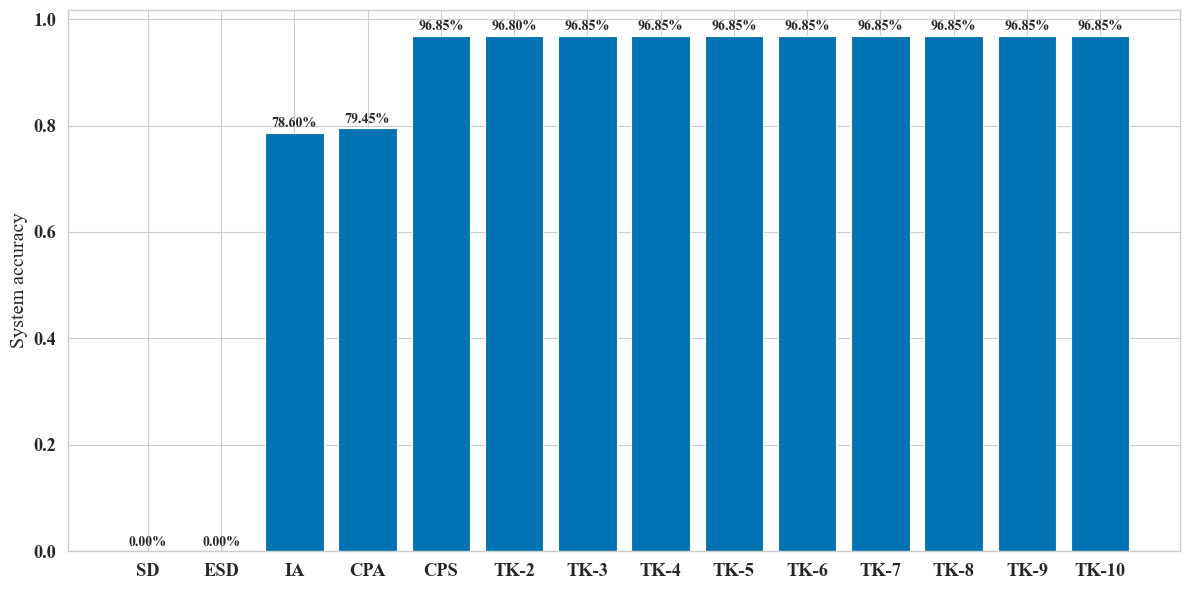

In [19]:
# plt.figure(figsize=(15, 8))
plt.figure(figsize=(12, 6))
plt.rcParams.update({"font.size": 10})  # 10 , 12
d = df.groupby("alg_K").correct.mean().sort_index(key=sort_algorithm)
p = plt.bar(d.index, list(d))
plt.ylabel("System accuracy")
labels = ["{x:,.2f}".format(x=i * 100) + "%" for i in d]
plt.bar_label(p, labels, padding=2)
plt.savefig(FIGURES_DIR / "accB_algK_v2")

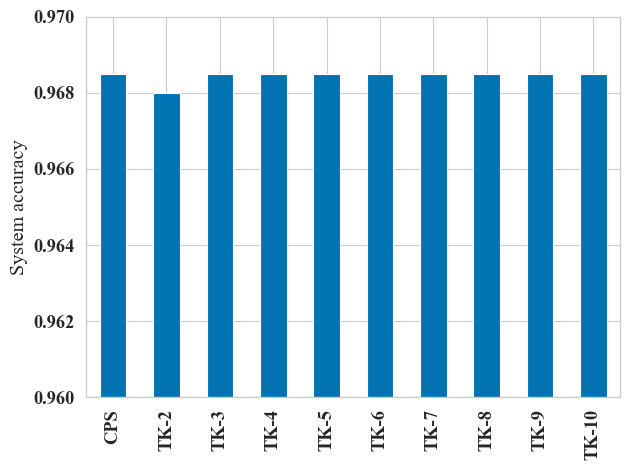

In [20]:
d = df.groupby("alg_K").correct.mean()
d = d[d > 0.9]
d.sort_index(key=sort_algorithm).plot(
    kind="bar", ylabel="System accuracy", xlabel="", ylim=(0.96, 0.97)
).get_figure().savefig(FIGURES_DIR / "accB_algK_filtered")

## Square accuracy

In [21]:
# overall model accuracy:
x = df.groupby("alg_K").agg({"correct_squares": ["median", "mean", "std"]})
x["accuracy median"] = x.correct_squares["median"] / 64
x["accuracy mean"] = x.correct_squares["mean"] / 64
x["accuracy std"] = x.correct_squares["std"] / 64
x

correct_squares                    accuracy median accuracy mean  \
               median     mean       std                                 
alg_K                                                                    
CPA              64.0  63.5720  0.860341        1.000000      0.993313   
CPS              64.0  63.9315  0.392281        1.000000      0.998930   
ESD              51.0  51.6765  3.770538        0.796875      0.807445   
IA               64.0  63.5640  0.844548        1.000000      0.993188   
SD               46.0  45.7965  4.406563        0.718750      0.715570   
TK-10            64.0  63.9315  0.392281        1.000000      0.998930   
TK-2             64.0  63.9315  0.387147        1.000000      0.998930   
TK-3             64.0  63.9315  0.392281        1.000000      0.998930   
TK-4             64.0  63.9315  0.392281        1.000000      0.998930   
TK-5             64.0  63.9315  0.392281        1.000000      0.998930   
TK-6             64.0  63.9315  0.392281        1.000000      0.998930   
TK-7             64.0  63.9315  0.392281        1.000000      0.998930   
TK-8             64.0  63.9315  0.392281        1.000000      0.998930   
TK-9             64.0  63.9315  0.392281        1.000000      0.998930   

      accuracy std  
                    
alg_K               
CPA       0.013443  
CPS       0.006129  
ESD       0.058915  
IA        0.013196  
SD        0.068853  
TK-10     0.006129  
TK-2      0.006049  
TK-3      0.006129  
TK-4      0.006129  
TK-5      0.006129  
TK-6      0.006129  
TK-7      0.006129  
TK-8      0.006129  
TK-9      0.006129

In [22]:
# number of squares guessed correctly:
d = df.copy()
d["correct_squares"] = df.correct_squares.apply(
    lambda x: (
        str(x) if x >= 50 else str(x // 10 * 10) + "-" + str((x // 10 + 1) * 10 - 1)
    )
)  # "<= 50")
d = (
    d.groupby(["alg_K", "correct_squares"])
    .agg({"image_path": "count"})
    .reset_index()
    .pivot(index="alg_K", values="image_path", columns="correct_squares")
    .fillna(0)
)
d

correct_squares,30-39,40-49,50,51,52,53,54,55,56,57,58,59,60,61,62,64
alg_K,,,,,,,,,,,,,,,,
CPA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0,393.0,1589.0
CPS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,57.0,1937.0
ESD,0.0,690.0,205.0,199.0,96.0,114.0,143.0,168.0,124.0,102.0,95.0,52.0,12.0,0.0,0.0,0.0
IA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,419.0,1572.0
SD,158.0,1471.0,60.0,59.0,70.0,74.0,36.0,23.0,42.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
TK-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,57.0,1937.0
TK-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,59.0,1936.0
TK-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,57.0,1937.0
TK-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,57.0,1937.0


In [23]:
df.groupby("alg_K").agg({"correct_squares": ["min", "max"]})

correct_squares    
                  min max
alg_K                    
CPA                60  64
CPS                60  64
ESD                45  60
IA                 60  64
SD                 36  57
TK-10              60  64
TK-2               60  64
TK-3               60  64
TK-4               60  64
TK-5               60  64
TK-6               60  64
TK-7               60  64
TK-8               60  64
TK-9               60  64

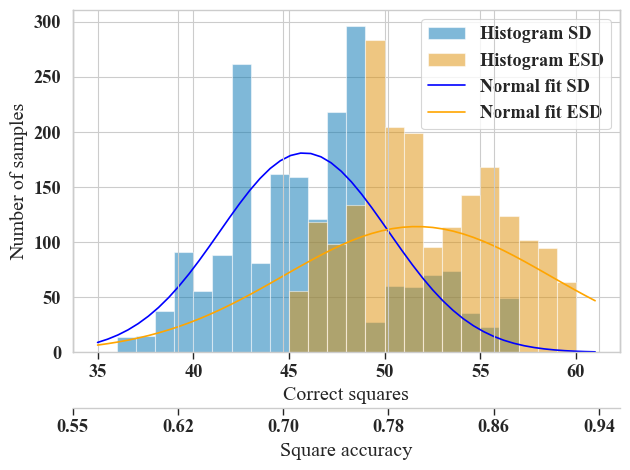

In [24]:
hist_sd = plt.hist(
    df[df.algorithm == "SD"].correct_squares,
    density=False,
    bins=57 - 36,
    label="Histogram SD",
    alpha=0.5,
)
hist_esd = plt.hist(
    df[df.algorithm == "ESD"].correct_squares,
    density=False,
    bins=60 - 45,
    label="Histogram ESD",
    alpha=0.5,
)

x = np.linspace(35, 61)
sd_mu = df[df.algorithm == "SD"].correct_squares.mean()
sd_s2 = ((df[df.algorithm == "SD"].correct_squares - sd_mu) ** 2).sum() / (1999)
sd_N = 1 / np.sqrt(2 * np.pi * sd_s2) * np.exp(-((x - sd_mu) ** 2) / (2 * sd_s2)) * 2000
esd_mu = df[df.algorithm == "ESD"].correct_squares.mean()
esd_s2 = ((df[df.algorithm == "ESD"].correct_squares - sd_mu) ** 2).sum() / (1999)
esd_N = (
    1 / np.sqrt(2 * np.pi * esd_s2) * np.exp(-((x - esd_mu) ** 2) / (2 * esd_s2)) * 2000
)

plt.plot(x, sd_N, color="blue", label="Normal fit SD")
plt.plot(x, esd_N, color="orange", label="Normal fit ESD")

plt.ylabel("Number of samples")
plt.xlabel("Correct squares")
plt.legend()

# add a second X axis:
ax2 = plt.gca().twiny()
ax2.set_xlim(35 / 64, 61 / 64)
ax2.set_xticks(np.arange(35, 62, 5) / 64)
ax2.set_xticklabels([f"{i/64:.2f}" for i in np.arange(35, 62, 5)])
ax2.set_xlabel("Square accuracy")

# Put the second axis at the bottom
ax2.spines["bottom"].set_position(("outward", 40))
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
ax2.spines["bottom"].set_visible(True)
# Hide the secondary top spines
ax2.spines["top"].set_visible(False)

plt.savefig(FIGURES_DIR / "accS_hist_bf")

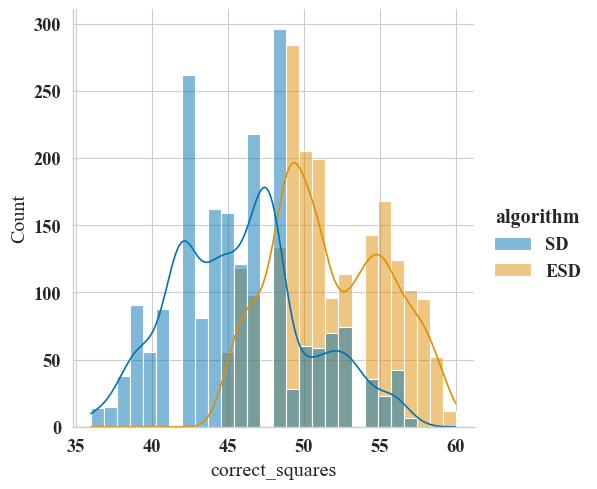

In [25]:
_ = sns.displot(
    data=df[df.algorithm.str.contains("SD")],
    x="correct_squares",
    hue="algorithm",
    kde=True,
    multiple="layer",
)

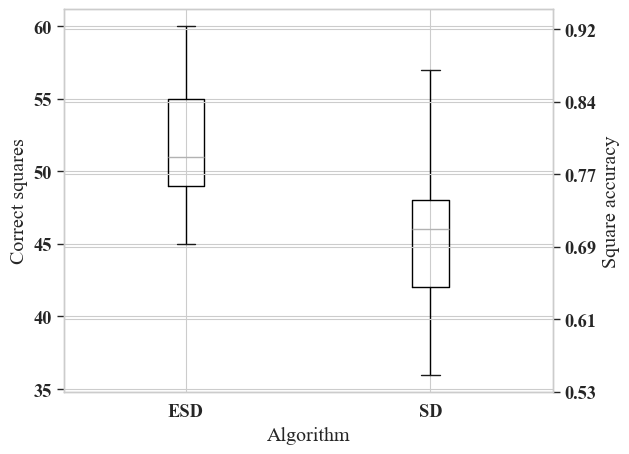

In [26]:
# df.boxplot(column = "correct_squares", by="algorithm", figsize=(20,8))
df[df.algorithm.str.contains("SD")].boxplot(column="correct_squares", by="algorithm")
plt.title("")
plt.suptitle("")
plt.ylabel("Correct squares")
plt.xlabel("Algorithm")

# Add another Y axis
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticks(np.arange(ax1.get_ylim()[0], ax1.get_ylim()[1] + 1, 5))
ax2.set_yticklabels(
    [f"{int(y)/64:.2f}" for y in np.arange(ax1.get_ylim()[0], ax1.get_ylim()[1] + 1, 5)]
)
ax2.set_ylabel("Square accuracy")

plt.savefig(FIGURES_DIR / "accS_boxplot_bf")

### Compare square accuracy of SD and ESD

first test the normality:

In [27]:
SAcc_sd = df[df.algorithm == "SD"].correct_squares / 64
shapiro(SAcc_sd)

ShapiroResult(statistic=np.float64(0.9785149035512094), pvalue=np.float64(8.861191928297219e-17))

In [28]:
SAcc_esd = df[df.algorithm == "ESD"].correct_squares / 64
shapiro(SAcc_esd)

ShapiroResult(statistic=np.float64(0.9620608667576352), pvalue=np.float64(1.7803340334175965e-22))

then proceed with the comparison:

In [29]:
wilcoxon(SAcc_sd, SAcc_esd, alternative="less")

WilcoxonResult(statistic=np.float64(132143.0), pvalue=np.float64(1.0986859874270909e-233))

In [30]:
# in fact, in all samples, ESD performs better than SD
(SAcc_sd - SAcc_esd > 0).reset_index().groupby("correct_squares").index.count()

correct_squares
False    4000
Name: index, dtype: int64

### Compare improvements introduced in IA and its following versions

In [31]:
N = 2000
pp = df.groupby("algorithm").correct.sum() / N
pp

algorithm
CPA    0.7945
CPS    0.9685
ESD    0.0000
IA     0.7860
SD     0.0000
TK     8.7160
Name: correct, dtype: float64

In [32]:
# each algorithm behaves as a Binomial distribution: k ~ Bin(p, n=2000), accuracy = k/n, k = correct samples
# test to compare the "p" of two algorithms:

p1 = pp["IA"]
p2 = pp["CPA"]
ph = (p1 + p2) / 2
z = (p1 - p2) / np.sqrt(ph * (1 - ph) * 2 / N)
print(f"Z-score: {z}")

cirtical_value = scipy.stats.norm.ppf(1 - ALPHA / 2)
print(f"Critical value: {cirtical_value}")

print(f"p-value: {scipy.stats.norm.cdf(z)}")

if abs(z) > cirtical_value:
    print("Reject H0 -> p1 != p2")
else:
    print("Accept H0 -> p1 = p2")

Z-score: -0.6602154583208837
Critical value: 1.959963984540054
p-value: 0.25455778681067165
Accept H0 -> p1 = p2


In [33]:
p1 = pp["CPA"]
p2 = pp["CPS"]
ph = (p1 + p2) / 2
z = (p1 - p2) / np.sqrt(ph * (1 - ph) * 2 / N)
print(f"Z-score: {z}")

cirtical_value = scipy.stats.norm.ppf(1 - ALPHA / 2)
print(f"Critical value: {cirtical_value}")

print(f"p-value: {scipy.stats.norm.cdf(z)}")

if abs(z) > cirtical_value:
    print("Reject H0 -> p1 != p2")
else:
    print("Accept H0 -> p1 = p2")

Z-score: -17.024678323554483
Critical value: 1.959963984540054
p-value: 2.6943894387213127e-65
Reject H0 -> p1 != p2


## Prediction Latency

In [34]:
# average time:
pd.concat(
    [
        df.groupby(["alg_K"]).agg(
            {"prediction_latency": ["mean", "std", "min", "max", "median"]}
        ),
        df.groupby(["alg_K"]).prediction_latency.quantile(0.25),
        df.groupby(["alg_K"]).prediction_latency.quantile(0.75),
    ],
    axis=1,
)

,"(prediction_latency, mean)","(prediction_latency, std)","(prediction_latency, min)","(prediction_latency, max)","(prediction_latency, median)",prediction_latency,prediction_latency
alg_K,,,,,,,
CPA,0.398833,0.132287,0.110201,1.382442,0.432935,0.339551,0.485991
CPS,0.479353,0.147601,0.131979,1.165900,0.518474,0.399834,0.576701
ESD,1.272337,0.190582,0.877396,3.562783,1.270907,1.162205,1.368123
IA,0.246428,0.083290,0.073301,1.064417,0.247622,0.202530,0.280956
SD,0.771011,0.044513,0.662185,1.460119,0.771352,0.751383,0.784818
TK-10,0.473551,0.167281,0.129771,1.879485,0.489475,0.396834,0.555911
TK-2,0.323685,0.084193,0.129863,1.018400,0.325870,0.268970,0.367831
TK-3,0.347167,0.088206,0.129622,1.019098,0.352758,0.295858,0.394921
TK-4,0.371791,0.096425,0.125478,1.032695,0.379139,0.323836,0.427732


<Figure size 1200x600 with 0 Axes>

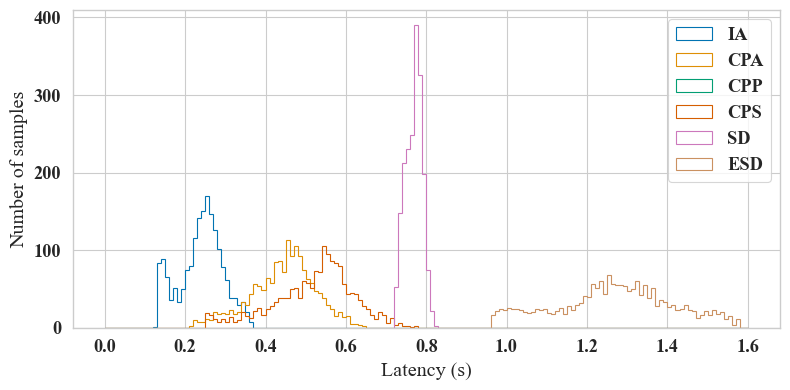

In [35]:
# prediction time:
# plt.figure(figsize = (16,6))
plt.figure(figsize=(12, 6))
plt.figure(figsize=(8, 4))

for alg in ["IA", "CPA", "CPP", "CPS", "SD", "ESD"]:  # to sort them in the order i want
    # for alg in [ 'TK2', 'TK10']: # to sort them in the order i want
    if alg != "TK":
        x = df[df.alg_K == alg].prediction_latency
        x = x[
            (x <= x.median() + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))
            & (x >= x.median() - 1.5 * (x.quantile(0.75) - x.quantile(0.25)))
        ]  # remove the outliers
        # plt.hist(x, density = False, bins = 30, alpha=1, label=alg, histtype="step") #  range = (0,2)
        plt.hist(
            x,
            density=False,
            bins=160,
            range=(0, 1.6),
            alpha=1,
            label=alg,
            histtype="step",
        )  #  range = (0,2)
        # plt.hist(x, density = True, alpha=1, bins = 30, label=alg, histtype="step") #  range = (0,2)
        plt.legend()
        # hay algunos pocos puntos más allá del 2 en realida

plt.ylabel("Number of samples")
plt.xlabel("Latency (s)")
plt.savefig(FIGURES_DIR / "time_hist_noTK_noOut")

In [36]:
d = df[df.alg_K == "CPA"]
d = d[d.prediction_latency < 1]
shapiro(d.prediction_latency)

ShapiroResult(statistic=np.float64(0.9127698487992641), pvalue=np.float64(1.9955921417478133e-32))

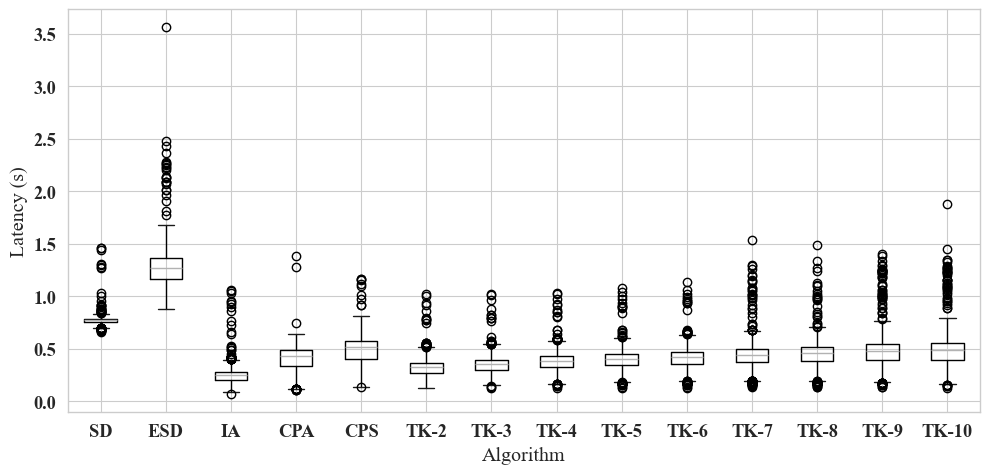

In [37]:
df.boxplot(
    column="prediction_latency",
    by="alg_K",
    figsize=(10, 5),
    positions=[3, 4, 1, 2, 0, 13, 5, 6, 7, 8, 9, 10, 11, 12],
)

plt.title("")
plt.suptitle("")
plt.ylabel("Latency (s)")
plt.xlabel("Algorithm")
plt.savefig(FIGURES_DIR / "time_boxplot_all")

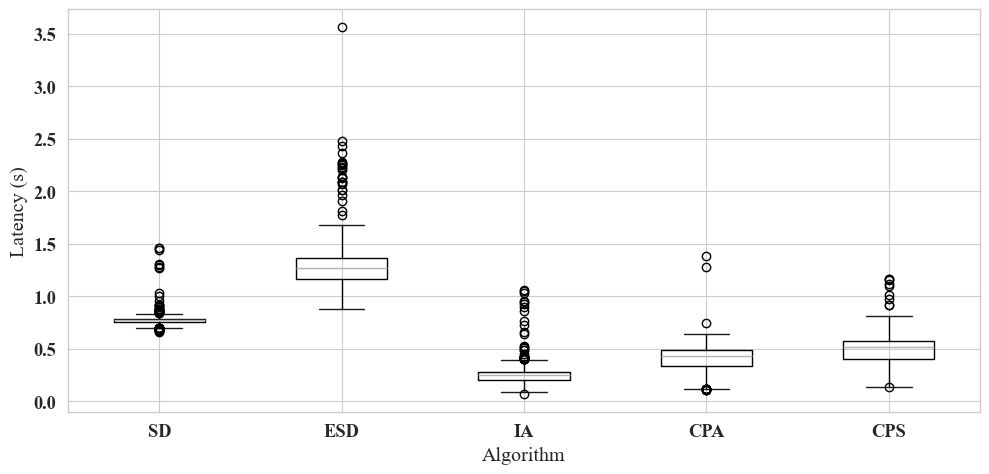

In [38]:
df[df.algorithm != "TK"].boxplot(
    column="prediction_latency",
    by="algorithm",
    positions=[3, 4, 1, 2, 0],  # to order the plots
    figsize=(10, 5),
)  # 14,8

plt.title("")
plt.suptitle("")
plt.ylabel("Latency (s)")
plt.xlabel("Algorithm")
plt.savefig(FIGURES_DIR / "time_boxplot_noTK")

/tmp/ipykernel_44073/1633386732.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["K"] = x["K"].apply(int)


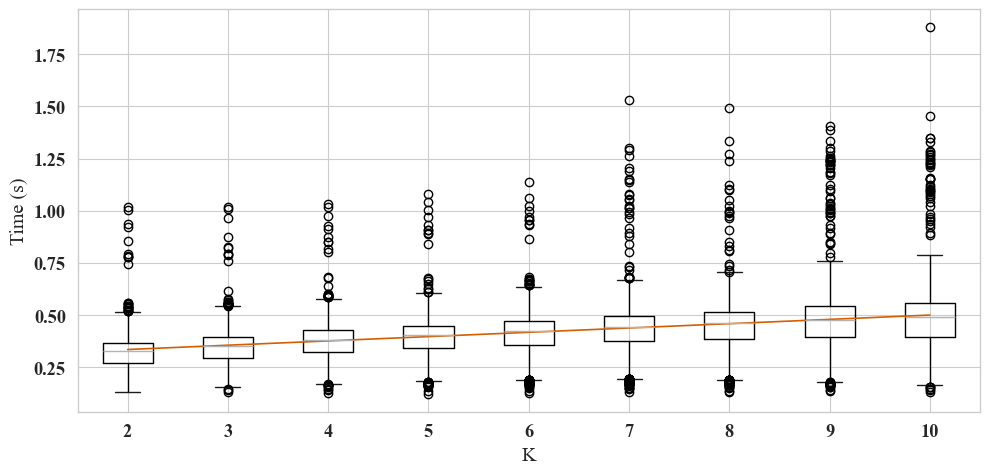

In [39]:
# change to integer for better visualization
x = df[df.algorithm == "TK"]
x["K"] = x["K"].apply(int)

x.boxplot(column="prediction_latency", by="K", figsize=(10, 5))

plt.title("")
plt.suptitle("")
plt.ylabel("Time (s)")
plt.xlabel("K")

# the values are obtained later, with a linear regression
plt.plot(
    np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
    np.array([2, 3, 4, 5, 6, 7, 8, 9, 10]) * 0.02063736750000528 + 0.2938751394444067,
    color="r",
)  # median
# plt.plot(np.array([1,2,3,4,5,6,7,8,9]), np.array([2,3,4,5,6,7,8,9,10])*0.01852690808249981+0.2946412627994451, color='g') # mean

plt.savefig(FIGURES_DIR / "time_boxplot_TK_line")

In [40]:
df["log_prediction_time"] = np.log(df["prediction_latency"])
df["sqrt_prediction_time"] = np.sqrt(df["prediction_latency"])

<Axes: title={'center': 'log_prediction_time'}, xlabel='alg_K'>

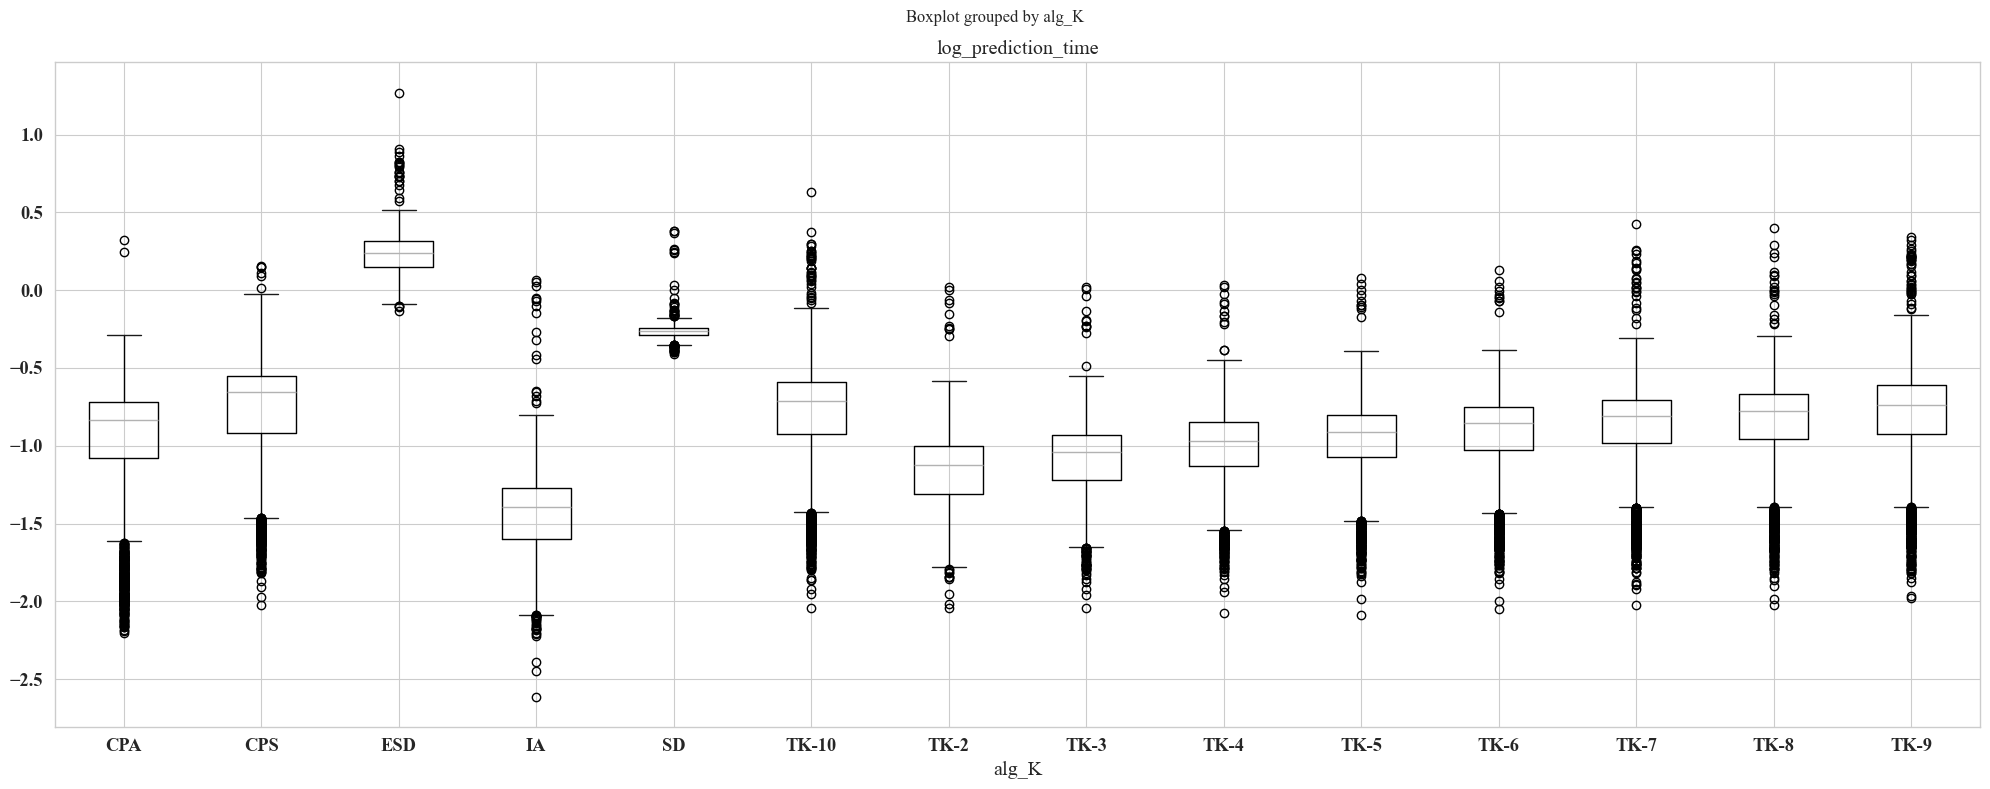

In [41]:
df.boxplot(column="log_prediction_time", by="alg_K", figsize=(20, 8))

### Compare time of CPA, CPS

first, test normality:

In [42]:
d = df.pivot(
    index=["previous_fen", "image_path"], values="prediction_latency", columns="alg_K"
).reset_index()

In [43]:
print(shapiro(d.CPA))
print(shapiro(d.CPS))

ShapiroResult(statistic=np.float64(0.9043285188720849), pvalue=np.float64(1.1514255576983375e-33))
ShapiroResult(statistic=np.float64(0.9334213632291783), pvalue=np.float64(5.384608028194803e-29))


then compare medians (Wilcoxon test) and dispersions (Fligner test), with and without outliers:

(here we also have Levene's test, although it's not used)

In [44]:
print("Wilcoxon test - compare medians")
print(wilcoxon(d.CPA, d.CPS, alternative="two-sided"))

print("Levene's test - compare variances")
print(levene(np.array(d.CPA), np.array(d.CPS)))

# levene without outliers:
cp02 = d.CPA[(d.CPA > 0.214) & (d.CPA < 0.653)]
cpc2 = d.CPA[(d.CPS > 0.253) & (d.CPS < 0.784)]
print("Levene without outliers")
print(levene(np.array(cp02), np.array(cpc2)))

print("Fligner test - compare IQR")
print(fligner(d.CPA, d.CPS))

Wilcoxon test - compare medians
WilcoxonResult(statistic=np.float64(11224.0), pvalue=np.float64(0.0))
Levene's test - compare variances
LeveneResult(statistic=np.float64(20.280663620719682), pvalue=np.float64(6.878005689260753e-06))
Levene without outliers
LeveneResult(statistic=np.float64(7.770944858919997), pvalue=np.float64(0.0053389487974338295))
Fligner test - compare IQR
FlignerResult(statistic=np.float64(35.57257372854777), pvalue=np.float64(2.4572292371152756e-09))


In [45]:
# without outliers:
dd = d[d.CPS < 0.784]
dd = dd[dd.CPA < 0.653]
dd = dd[dd.CPS > 0.253]
dd = dd[dd.CPA > 0.214]
print(wilcoxon(dd.CPA, dd.CPS, alternative="two-sided"))
print(fligner(dd.CPA, dd.CPS))

WilcoxonResult(statistic=np.float64(2799.0), pvalue=np.float64(4.2150176006794043e-271))
FlignerResult(statistic=np.float64(31.238318947762266), pvalue=np.float64(2.282165546274768e-08))


### Compare prediction latency of all approaches

In [46]:
# first, including outliers
aa = [a for a in SELECTED_ALGORITHMS]
samples = [np.array(df[df.alg_K == a].prediction_latency) for a in aa]
results = kruskal(*samples)
results

KruskalResult(statistic=np.float64(11871.677432157816), pvalue=np.float64(0.0))

In [47]:
eta_squared(results.statistic, len(SELECTED_ALGORITHMS), len(df[df.alg_K.isin(aa)]))

np.float64(0.6594229021264975)

In [48]:
# now without the outliers
samples = []
for a in aa:
    x = df[df.alg_K == a].prediction_latency
    x = x[
        (x <= x.median() + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))
        & (x >= x.median() - 1.5 * (x.quantile(0.75) - x.quantile(0.25)))
    ]  # remove the outliers
    samples.append(np.array(x))
kruskal(*samples)

KruskalResult(statistic=np.float64(12915.37942048353), pvalue=np.float64(0.0))

,CPA,CPS,ESD,IA,SD,TK-2,TK-3,TK-4,TK-5
CPA,1.000000e+00,1.313249e-28,0.000000e+00,2.409056e-246,0.000000e+00,3.823750e-71,2.000770e-34,1.852844e-10,8.840816e-03
CPS,1.313249e-28,1.000000e+00,0.000000e+00,0.000000e+00,4.332346e-173,8.066453e-187,9.505679e-123,2.201850e-70,8.388200e-43
ESD,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.098154e-34,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
IA,2.409056e-246,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,6.141433e-54,1.536706e-98,2.862501e-159,1.341332e-209
SD,0.000000e+00,4.332346e-173,1.098154e-34,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
TK-2,3.823750e-71,8.066453e-187,0.000000e+00,6.141433e-54,0.000000e+00,1.000000e+00,7.548335e-08,4.734674e-29,3.272326e-52
TK-3,2.000770e-34,9.505679e-123,0.000000e+00,1.536706e-98,0.000000e+00,7.548335e-08,1.000000e+00,2.691496e-08,7.111832e-22
TK-4,1.852844e-10,2.201850e-70,0.000000e+00,2.862501e-159,0.000000e+00,4.734674e-29,2.691496e-08,1.000000e+00,1.281692e-04
TK-5,8.840816e-03,8.388200e-43,0.000000e+00,1.341332e-209,0.000000e+00,3.272326e-52,7.111832e-22,1.281692e-04,1.000000e+00


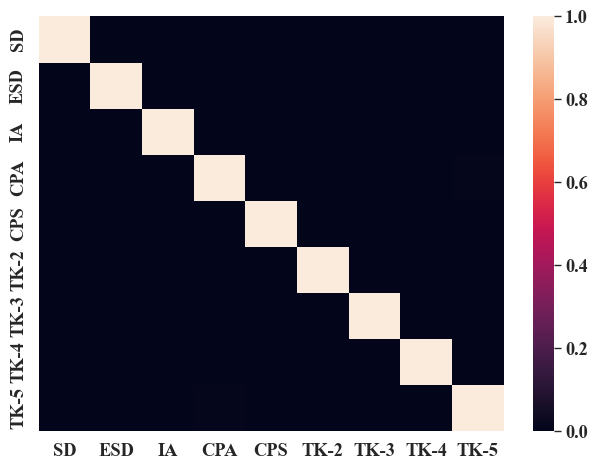

In [49]:
# post-hoc test
p_values = sp.posthoc_dunn(
    df.query("alg_K in @SELECTED_ALGORITHMS"),
    val_col="prediction_latency",
    group_col="alg_K",
    p_adjust="holm",
)
sns.heatmap(
    p_values.sort_index(key=sort_algorithm).sort_index(key=sort_algorithm, axis=1)
).get_figure().savefig(FIGURES_DIR / "prediction_latency_dunn")

p_values

<Axes: >

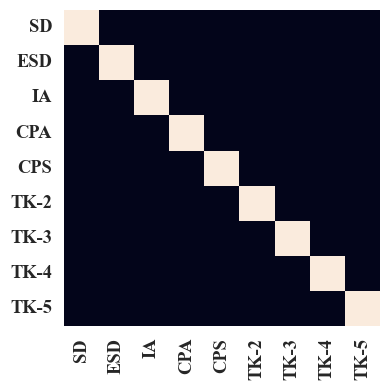

In [50]:
# Filter with the p-values greater than 0.05
plt.figure(figsize=(4, 4))
p_values = sp.posthoc_dunn(
    df.query("alg_K in @SELECTED_ALGORITHMS"),
    val_col="prediction_latency",
    group_col="alg_K",
    p_adjust="holm",
)

sns.heatmap(
    (p_values > 0.05)
    .sort_index(key=sort_algorithm)
    .sort_index(key=sort_algorithm, axis=1),
    cbar=False,
)

### Analyze the linear behaviour of K in top-K

In [51]:
# tried both with mean and median
time_k = df.groupby("K").prediction_latency.mean().reset_index()
time_k = df.groupby("K").prediction_latency.median().reset_index()

In [52]:
# regression for the mean/median time of each K: (very linear fit)
linregress(x=time_k.K, y=time_k.prediction_latency)

LinregressResult(slope=np.float64(0.004387559750244296), intercept=np.float64(0.4068287933237115), rvalue=np.float64(0.2245057084842838), pvalue=np.float64(0.5329073054129068), stderr=np.float64(0.00673318227885871), intercept_stderr=np.float64(0.041778297339802796))

In [53]:
# regression with all the samples of each K: (the R2 is reduced)
d = df[df.algorithm == "TK"]
linregress(x=d.K, y=d.prediction_latency)

LinregressResult(slope=np.float64(0.01885417006833325), intercept=np.float64(0.29229323453444467), rvalue=np.float64(0.36767274013173395), pvalue=np.float64(0.0), stderr=np.float64(0.00035546423643874065), intercept_stderr=np.float64(0.0023218826695545324))

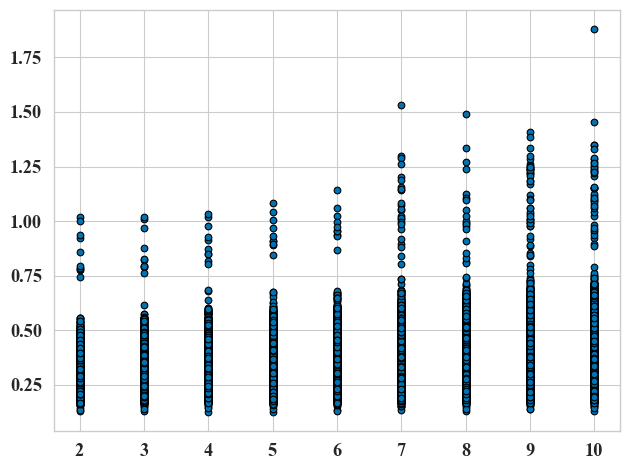

In [54]:
plt.scatter(d.K, d.prediction_latency)

## Energy consumption

In [55]:
df.groupby("alg_K").agg(
    {
        "energy_cpu": ["median", "mean", "std"],
        "energy_gpu": ["median", "mean", "std"],
        "energy_ram": ["median", "mean", "std"],
        "energy_total": ["median", "mean", "std"],
    }
).round(2)

energy_cpu              energy_gpu             energy_ram               \
          median   mean   std     median  mean   std     median   mean   std   
alg_K                                                                          
CPA         8.65   7.94  2.68       5.36  6.13  2.65      16.71  16.47  1.92   
CPS         9.97   9.25  2.76       5.39  6.37  2.92      18.48  18.09  1.75   
ESD        23.78  24.27  4.84       5.62  7.22  4.52      29.02  29.07  2.31   
IA          4.85   4.85  1.62       5.20  5.74  2.04      13.62  13.76  1.57   
SD         14.33  14.44  1.50       5.46  6.51  3.18      22.59  22.66  0.85   
TK-10       9.58   9.03  3.02       5.39  6.53  2.99      25.09  25.39  3.14   
TK-2        6.41   6.37  1.65       5.40  6.31  2.62      18.36  18.34  1.03   
TK-3        7.02   6.89  1.75       5.33  6.19  2.51      19.26  19.22  1.10   
TK-4        7.53   7.33  1.92       5.36  6.36  2.72      20.12  20.05  1.26   
TK-5        7.96   7.69  2.01       5.28  6.28  2.73      21.12  21.00  1.30   
TK-6        8.45   8.09  2.20       5.34  6.29  2.71      21.97  21.79  1.41   
TK-7        8.72   8.32  2.50       5.26  6.26  2.82      22.88  22.99  2.43   
TK-8        9.00   8.55  2.50       5.32  6.35  2.82      23.45  23.39  2.32   
TK-9        9.40   8.84  3.03       5.54  6.63  2.98      24.39  24.69  2.96   

      energy_total               
            median   mean   std  
alg_K                            
CPA          30.97  30.54  5.32  
CPS          34.24  33.71  5.47  
ESD          59.12  60.55  8.89  
IA           23.84  24.35  3.74  
SD           42.54  43.61  4.04  
TK-10        40.68  40.95  6.36  
TK-2         30.52  31.02  3.78  
TK-3         31.91  32.30  3.81  
TK-4         33.42  33.75  4.07  
TK-5         34.75  34.96  4.25  
TK-6         36.17  36.17  4.40  
TK-7         37.22  37.56  5.40  
TK-8         38.06  38.29  5.24  
TK-9         39.75  40.16  6.23

In [56]:
d = (
    df.groupby("alg_K")
    .agg(
        {
            "energy_cpu": "median",
            "energy_gpu": "median",
            "energy_ram": "median",
            "energy_total": "median",
        }
    )
    .sort_index(key=sort_algorithm)
)
d.head()

,energy_cpu,energy_gpu,energy_ram,energy_total
alg_K,,,,
SD,14.327782,5.464004,22.593213,42.542491
ESD,23.776976,5.618004,29.015763,59.119785
IA,4.850858,5.200504,13.623500,23.839970
CPA,8.651757,5.359504,16.705562,30.966059
CPS,9.974234,5.388504,18.482146,34.240699


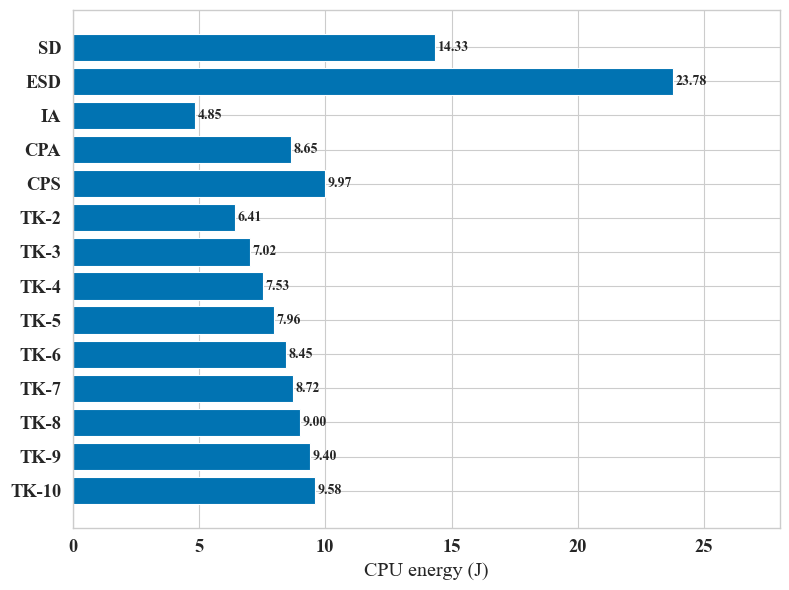

In [57]:
plt.figure(figsize=(8, 6))
p = plt.barh(d.index, d.energy_cpu)
plt.xlabel("CPU energy (J)")
labels = ["{x:,.2f}".format(x=i) + "" for i in d.energy_cpu]
plt.bar_label(p, labels, padding=2)
plt.gca().invert_yaxis()
plt.xlim(0, 28)

plt.savefig(FIGURES_DIR / "energy_cpu_hbars")

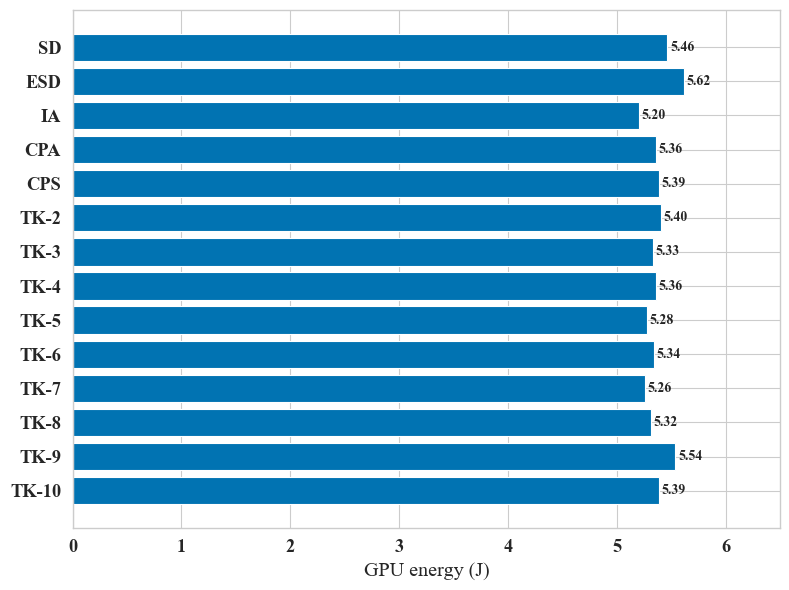

In [58]:
plt.figure(figsize=(8, 6))
p = plt.barh(d.index, d.energy_gpu)
plt.xlabel("GPU energy (J)")
labels = ["{x:,.2f}".format(x=i) + "" for i in d.energy_gpu]
plt.bar_label(p, labels, padding=2)
plt.gca().invert_yaxis()
plt.xlim(0, 6.5)

plt.savefig(FIGURES_DIR / "energy_gpu_hbars")

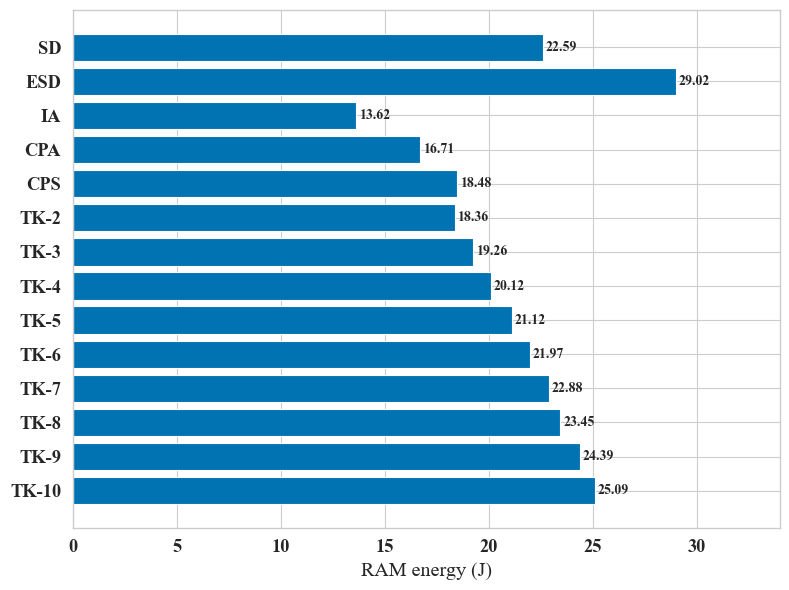

In [59]:
plt.figure(figsize=(8, 6))
p = plt.barh(d.index, d.energy_ram)
plt.xlabel("RAM energy (J)")
labels = ["{x:,.2f}".format(x=i) + "" for i in d.energy_ram]
plt.bar_label(p, labels, padding=2)
plt.gca().invert_yaxis()
plt.xlim(0, 34)

plt.savefig(FIGURES_DIR / "energy_ram_hbars")

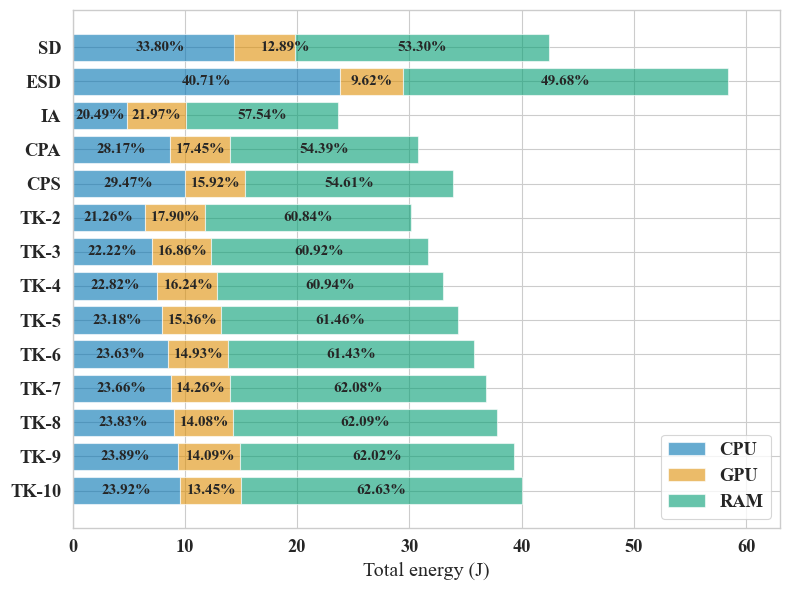

In [60]:
plt.figure(figsize=(8, 6))  # (10,6) for the slides
p1 = plt.barh(d.index, d.energy_cpu, label="CPU", alpha=0.6)
p2 = plt.barh(d.index, d.energy_gpu, left=d.energy_cpu, label="GPU", alpha=0.6)
p3 = plt.barh(
    d.index, d.energy_ram, left=d.energy_cpu + d.energy_gpu, label="RAM", alpha=0.6
)
plt.legend()
plt.xlabel("Total energy (J)")

# for the percentages:
d2 = d[["energy_cpu", "energy_gpu", "energy_ram"]]
d2 = d2.div(d2.sum(axis=1), axis=0)
labels_c = ["{x:,.2f}".format(x=100 * i) + "%" for i in d2.energy_cpu]
labels_g = ["{x:,.2f}".format(x=100 * i) + "%" for i in d2.energy_gpu]
labels_r = ["{x:,.2f}".format(x=100 * i) + "%" for i in d2.energy_ram]

# add the labels
l1 = plt.bar_label(p1, labels_c, label_type="center", fontsize=11)
l1[0].set_x(5)
l2 = plt.bar_label(p2, labels_g, label_type="center", fontsize=11)
l2[0].set_x(15)
plt.bar_label(p3, labels_r, label_type="center", fontsize=11)
# ajust axis
plt.gca().invert_yaxis()
plt.xlim(0, 63)

plt.savefig(FIGURES_DIR / "energy_total_hbars.pdf")

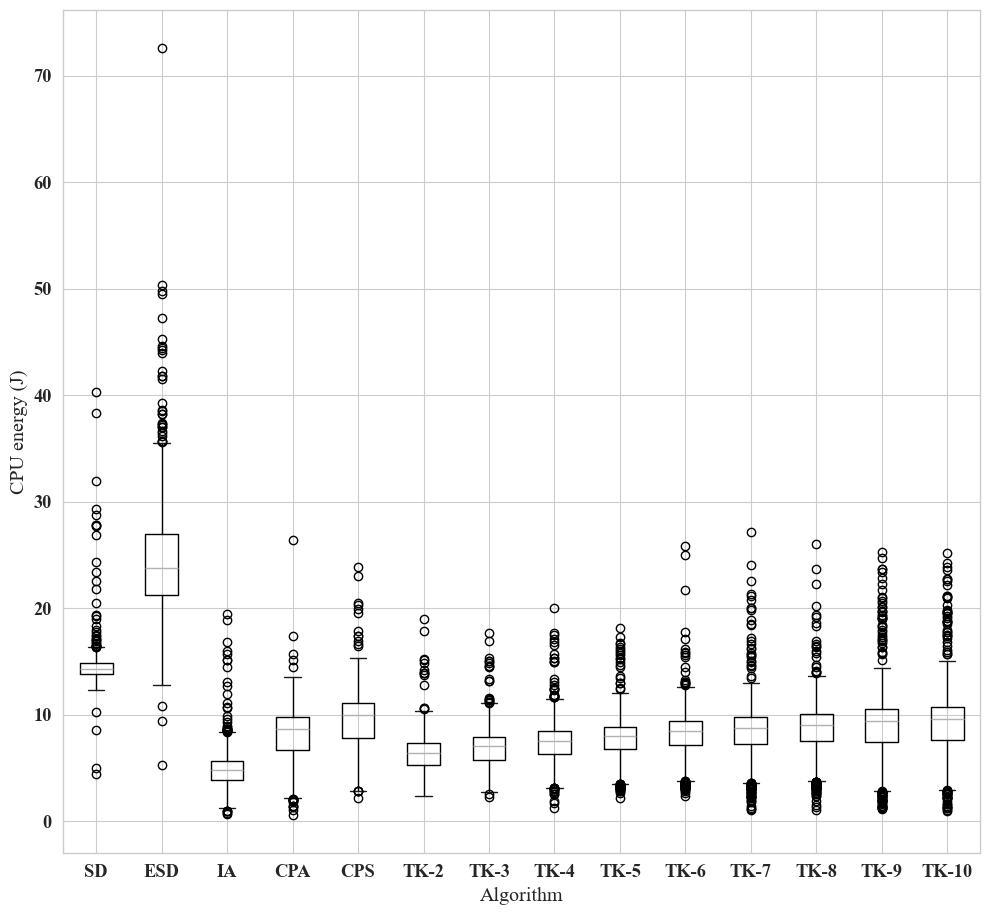

In [61]:
df.boxplot(
    column="energy_cpu",
    by="alg_K",
    positions=[3, 4, 1, 2, 0, 13, 5, 6, 7, 8, 9, 10, 11, 12],
    figsize=(10, 9.4),
)

plt.title("")
plt.suptitle("")
plt.ylabel("CPU energy (J)")
plt.xlabel("Algorithm")
plt.savefig(FIGURES_DIR / "energy_cpu_boxplot")

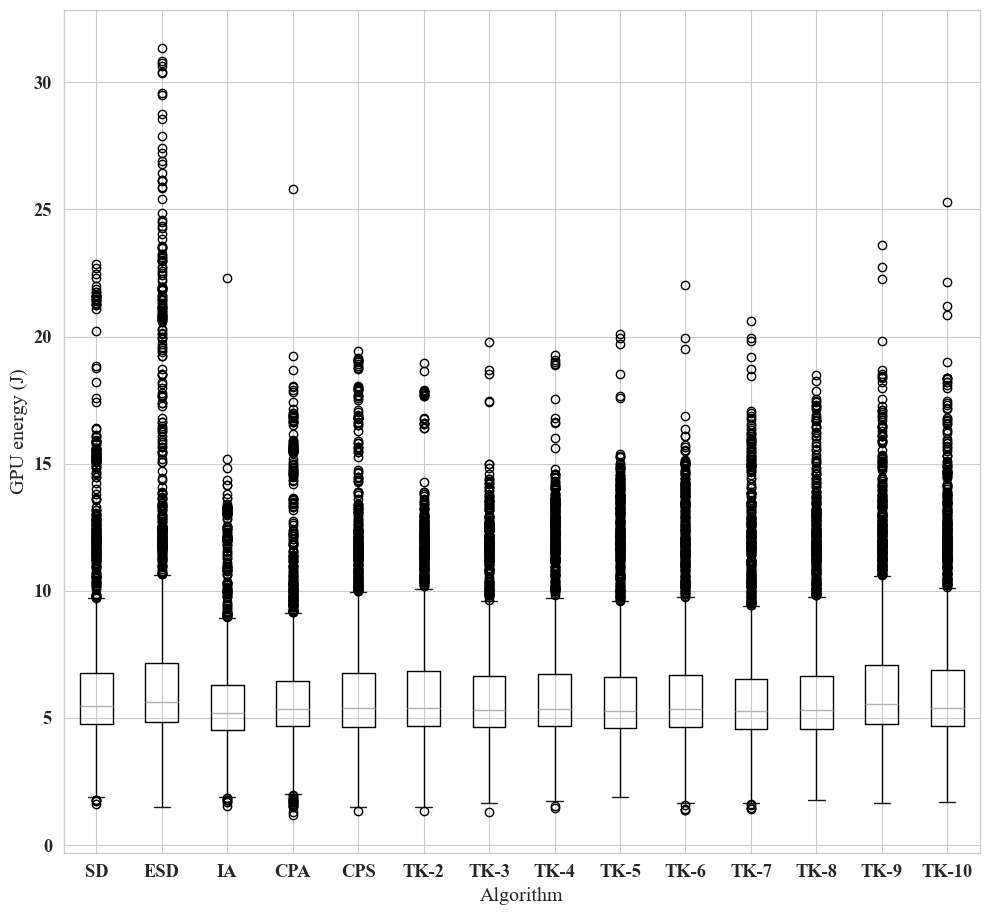

In [62]:
df.boxplot(
    column="energy_gpu",
    by="alg_K",
    positions=[3, 4, 1, 2, 0, 13, 5, 6, 7, 8, 9, 10, 11, 12],
    figsize=(10, 9.4),
)

plt.title("")
plt.suptitle("")
plt.ylabel("GPU energy (J)")
plt.xlabel("Algorithm")
plt.savefig(FIGURES_DIR / "energy_gpu_boxplot")

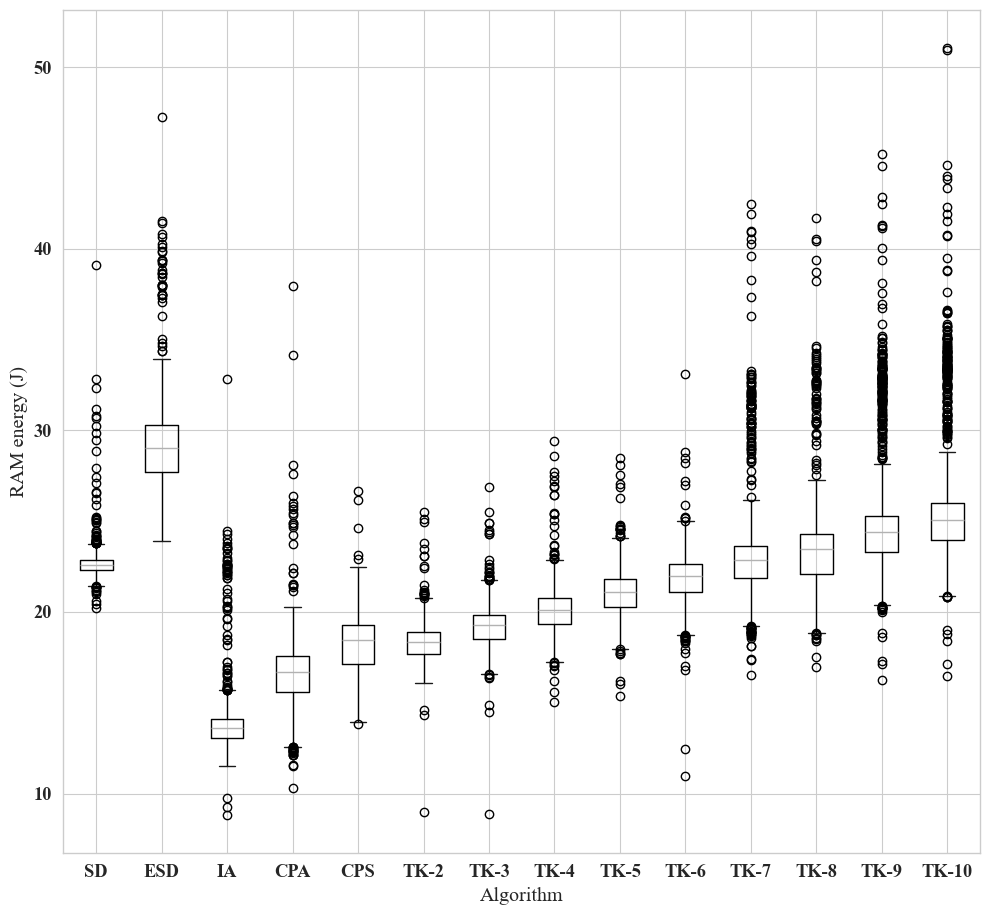

In [63]:
df.boxplot(
    column="energy_ram",
    by="alg_K",
    positions=[3, 4, 1, 2, 0, 13, 5, 6, 7, 8, 9, 10, 11, 12],
    figsize=(10, 9.4),
)

plt.title("")
plt.suptitle("")
plt.ylabel("RAM energy (J)")
plt.xlabel("Algorithm")
plt.savefig(FIGURES_DIR / "energy_ram_boxplot")

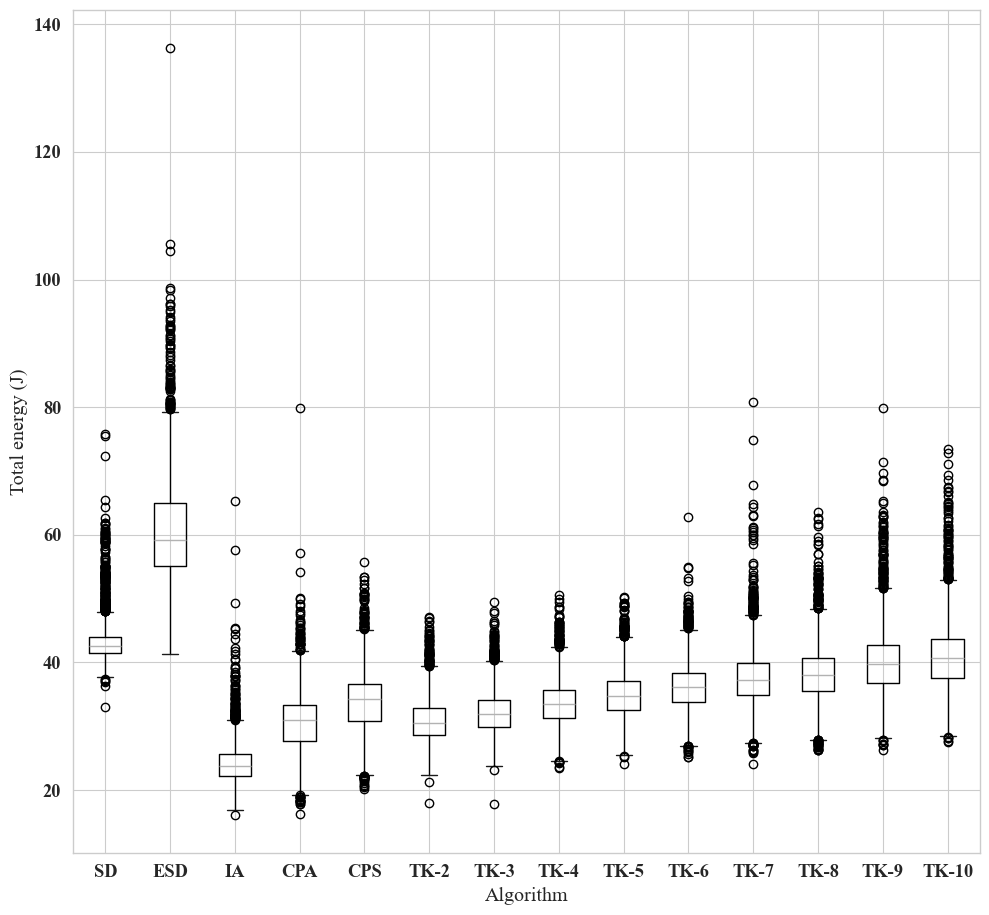

In [64]:
df.boxplot(
    column="energy_total",
    by="alg_K",
    positions=[3, 4, 1, 2, 0, 13, 5, 6, 7, 8, 9, 10, 11, 12],
    figsize=(10, 9.4),
)

plt.title("")
plt.suptitle("")
plt.ylabel("Total energy (J)")
plt.xlabel("Algorithm")
plt.savefig(FIGURES_DIR / "energy_total_boxplot")

### Total energy of SD vs other domain-aware approaches

In [65]:
E_bf1 = df[df.alg_K == "SD"].energy_total

for a in df.alg_K.unique():
    if a != "SD" and a != "ESD":
        E_x = df[df.alg_K == a].energy_total
        print(a, wilcoxon(E_bf1, E_x, alternative="greater"))

IA WilcoxonResult(statistic=np.float64(1999169.0), pvalue=np.float64(0.0))
CPA WilcoxonResult(statistic=np.float64(1994325.0), pvalue=np.float64(0.0))
CPS WilcoxonResult(statistic=np.float64(1971728.0), pvalue=np.float64(1.019716594644494e-309))
TK-2 WilcoxonResult(statistic=np.float64(1999791.0), pvalue=np.float64(0.0))
TK-3 WilcoxonResult(statistic=np.float64(1998090.0), pvalue=np.float64(0.0))
TK-4 WilcoxonResult(statistic=np.float64(1989013.0), pvalue=np.float64(0.0))
TK-5 WilcoxonResult(statistic=np.float64(1976290.0), pvalue=np.float64(0.0))
TK-6 WilcoxonResult(statistic=np.float64(1948214.0), pvalue=np.float64(5.07304803724369e-295))
TK-7 WilcoxonResult(statistic=np.float64(1830089.0), pvalue=np.float64(1.2440599717501755e-226))
TK-8 WilcoxonResult(statistic=np.float64(1786437.0), pvalue=np.float64(1.1781289252255618e-203))
TK-9 WilcoxonResult(statistic=np.float64(1547698.0), pvalue=np.float64(6.574210626144722e-100))
TK-10 WilcoxonResult(statistic=np.float64(1427634.0), pvalue=

### Compare total energy of all approaches

In [66]:
# first, including outliers
aa = [a for a in SELECTED_ALGORITHMS]
samples = [np.array(df[df.alg_K == a].energy_total) for a in aa]
results = kruskal(*samples)
results

KruskalResult(statistic=np.float64(12058.803001959852), pvalue=np.float64(0.0))

In [67]:
eta_squared(results.statistic, len(SELECTED_ALGORITHMS), len(df[df.alg_K.isin(aa)]))

np.float64(0.6698239676482604)

In [68]:
# now without the outliers
samples = []
for a in aa:
    x = df[df.alg_K == a].energy_gpu
    x = x[
        (x <= x.median() + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))
        & (x >= x.median() - 1.5 * (x.quantile(0.75) - x.quantile(0.25)))
    ]  # remove the outliers
    samples.append(np.array(x))
kruskal(*samples)

KruskalResult(statistic=np.float64(95.96952648898016), pvalue=np.float64(2.8383367350740894e-17))

,CPA,CPS,ESD,IA,SD,TK-2,TK-3,TK-4,TK-5
CPA,1.000000e+00,4.037829e-54,0.000000e+00,1.037072e-151,0.000000e+00,1.000000e+00,2.723112e-13,1.611190e-52,2.490838e-103
CPS,4.037829e-54,1.000000e+00,0.000000e+00,0.000000e+00,3.412724e-274,2.686779e-50,3.904062e-15,1.000000e+00,4.246852e-09
ESD,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.447553e-43,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
IA,1.037072e-151,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.080120e-158,2.001641e-250,0.000000e+00,0.000000e+00
SD,0.000000e+00,3.412724e-274,2.447553e-43,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.687912e-278,7.193420e-189
TK-2,1.000000e+00,2.686779e-50,0.000000e+00,2.080120e-158,0.000000e+00,1.000000e+00,1.651670e-11,9.207264e-49,6.020781e-98
TK-3,2.723112e-13,3.904062e-15,0.000000e+00,2.001641e-250,0.000000e+00,1.651670e-11,1.000000e+00,2.415514e-14,1.442729e-44
TK-4,1.611190e-52,1.000000e+00,0.000000e+00,0.000000e+00,6.687912e-278,9.207264e-49,2.415514e-14,1.000000e+00,1.231834e-09
TK-5,2.490838e-103,4.246852e-09,0.000000e+00,0.000000e+00,7.193420e-189,6.020781e-98,1.442729e-44,1.231834e-09,1.000000e+00


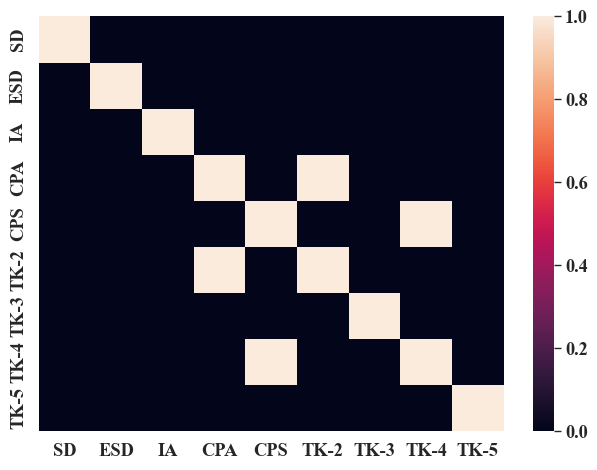

In [69]:
# post-hoc test
p_values = sp.posthoc_dunn(
    df.query("alg_K in @SELECTED_ALGORITHMS"),
    val_col="energy_total",
    group_col="alg_K",
    p_adjust="holm",
)
sns.heatmap(
    p_values.sort_index(key=sort_algorithm).sort_index(key=sort_algorithm, axis=1)
).get_figure().savefig(FIGURES_DIR / "energy_total_dunn")

p_values

<Axes: >

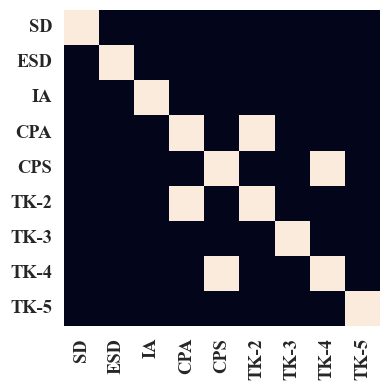

In [70]:
# Filter with the p-values greater than 0.05
plt.figure(figsize=(4, 4))
p_values = sp.posthoc_dunn(
    df.query("alg_K in @SELECTED_ALGORITHMS"),
    val_col="energy_total",
    group_col="alg_K",
    p_adjust="holm",
)

sns.heatmap(
    (p_values > 0.05)
    .sort_index(key=sort_algorithm)
    .sort_index(key=sort_algorithm, axis=1),
    cbar=False,
)